In [13]:

import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [14]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(r"C:\Users\umair khan\Desktop\face_dataset\train",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(r"C:\Users\umair khan\Desktop\face_dataset\test",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1802 images belonging to 2 classes.
Found 361 images belonging to 2 classes.


In [15]:
test_dataset.class_indices

{'happy': 0, 'sad': 1}

In [16]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
#steps_per_epoch = train_imagesize/batch_size

history = model.fit(train_dataset,
         steps_per_epoch = 25,
         epochs = 60,
         validation_data = test_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 25 steps, validate for 12 steps
Epoch 1/60
25/25 [==============================] - 30s 1s/step - loss: 0.6993 - accuracy: 0.5475 - val_loss: 0.6653 - val_accuracy: 0.5014
Epoch 2/60
25/25 [==============================] - 31s 1s/step - loss: 0.5476 - accuracy: 0.7057 - val_loss: 0.3302 - val_accuracy: 0.8892
Epoch 3/60
25/25 [==============================] - 32s 1s/step - loss: 0.3258 - accuracy: 0.8475 - val_loss: 0.2489 - val_accuracy: 0.8947
Epoch 4/60
25/25 [==============================] - 35s 1s/step - loss: 0.1969 - accuracy: 0.9137 - val_loss: 0.2039 - val_accuracy: 0.9114
Epoch 5/60
25/25 [==============================] - 32s 1s/step - loss: 0.1367 - accuracy: 0.9388 - val_loss: 0.1361 - val_accuracy: 0.9446
Epoch 6/60
25/25 [==============================] - 29s 1s/step - loss: 0.1190 - accuracy: 0.9499 - val_loss: 0.0972 - val_accuracy: 0.9668
Epoch 7/60
25/25 [==============================] - 32s 1s/step - lo

25/25 [==============================] - 32s 1s/step - loss: 2.0575e-05 - accuracy: 1.0000 - val_loss: 0.0856 - val_accuracy: 0.9695
Epoch 58/60
25/25 [==============================] - 32s 1s/step - loss: 2.0121e-05 - accuracy: 1.0000 - val_loss: 0.0856 - val_accuracy: 0.9723
Epoch 59/60
25/25 [==============================] - 31s 1s/step - loss: 2.6437e-05 - accuracy: 1.0000 - val_loss: 0.0848 - val_accuracy: 0.9723
Epoch 60/60
25/25 [==============================] - 31s 1s/step - loss: 2.1492e-05 - accuracy: 1.0000 - val_loss: 0.0862 - val_accuracy: 0.9723


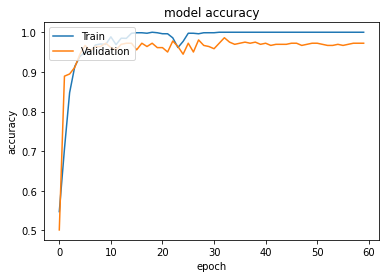

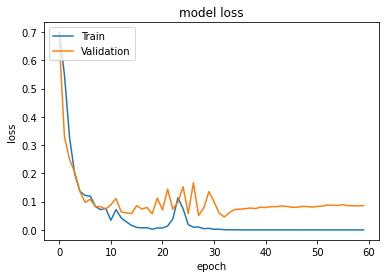

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("ghmgeen",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Happy",fontsize=30)

    

[[0.]]


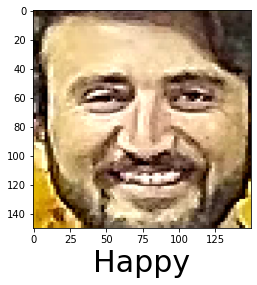

In [17]:
predictImage(r"C:\Users\umair khan\Desktop\face_dataset\test\happy\297.png")

[[1.]]


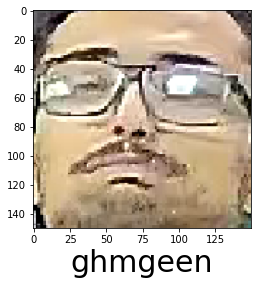

In [18]:
predictImage(r"C:\Users\umair khan\Desktop\face_dataset\test\sad\368.png")

[[1.]]


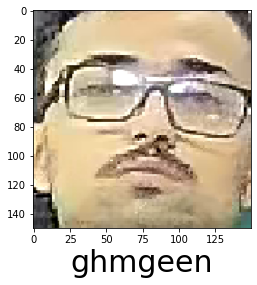

In [22]:
predictImage(r"C:\Users\umair khan\Desktop\faces_expression_dataset\Happy_Images\train\neutral_images\86.png")

[[0.01694221]]


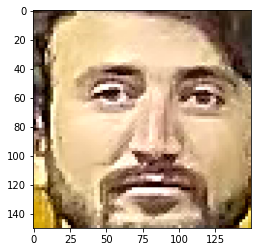

In [23]:
predictImage(r"C:\Users\umair khan\Desktop\faces_expression_dataset\Happy_Images\train\neutral_images\98.png")